In [19]:
import numpy as np
import random
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [20]:
df = pd.read_csv('BostonHousingSmall5.csv')
df.head(5)

,CRIM,NOX,RM,PTRATIO,LSTAT,MEDV
0,4.22239,0.770,5.803,20.2,14.64,16.8
1,0.22438,0.585,6.027,19.2,14.33,16.8
2,0.04301,0.413,5.663,22.0,8.05,18.2
3,0.05479,0.472,6.616,18.4,8.93,28.4
4,0.09178,0.510,6.416,16.6,9.04,23.6


In [21]:
# 1) scatterplot of MEDV versus CRIM. 
x = df['CRIM']
y = df['MEDV']

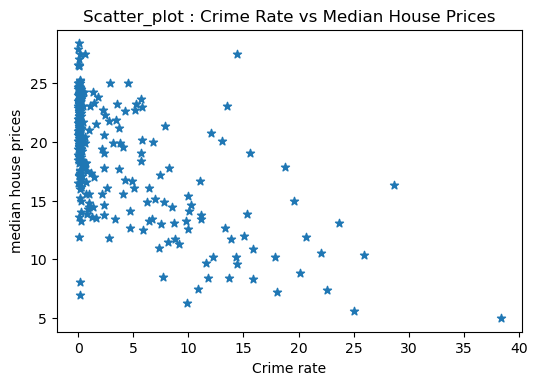

In [22]:
plt.figure(dpi = 100)
plt.xlabel("Crime rate")
plt.ylabel("median house prices")
plt.scatter(df.CRIM, df.MEDV, marker = '*')
plt.title('Scatter_plot : Crime Rate vs Median House Prices')
plt.show()

It seems that there is negative linear relation between Crime rate and median house prices.
It helps to predict the medain house prices using the crime rate.
We can conclude that high median house prices has low crime rate. CRIM appear helpful in predicting MEDV.

In [23]:
# 2) regression of MEDV versus CRIM. and p-value 
reg = linear_model.LinearRegression()
reg.fit(df[['CRIM']], df.MEDV)

LinearRegression()

In [24]:
# find and print the regression coefficients
print("The Regression Coefficient is:", reg.coef_)
print("The Intercept of regression line is:", reg.intercept_)

The Regression Coefficient is: [-0.48245636]
The Intercept of regression line is: 20.484025119103073


In [25]:
x = sm.add_constant(x)

# Regression analysis between MEDV and all predictor variables
reg_model = sm.OLS(y, x)
results = reg_model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     154.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           3.32e-28
Time:                        13:32:38   Log-Likelihood:                -739.54
No. Observations:                 267   AIC:                             1483.
Df Residuals:                     265   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4840      0.276     74.260      0.0

C:\Users\svish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Since Prob (F-statistic): 3.32e-28 < 0.05, the model is significant. 
Also p values for the intercept and CRIM are 0 < 0.05, So, the intercept and the independent variable contributes 
Significantly to the model.
Adj. R-squared = 0.365 , that means 36.5 % of the data fit the regression model.

Text(0.5, 1.0, 'Scatter Plot : Status vs Median House Prices')

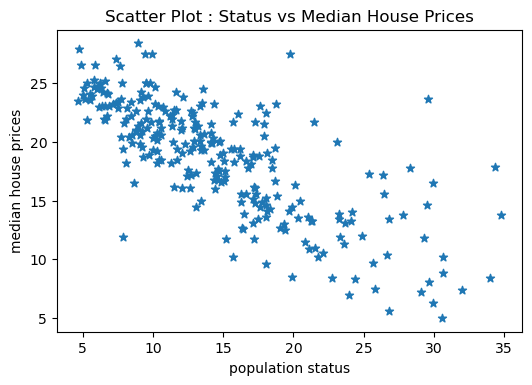

In [26]:
# 3) Make a scatterplot of MEDV versus LSTAT.
plt.figure(dpi = 100)
x1 = df['LSTAT']
plt.xlabel("population status")
plt.ylabel("median house prices")
plt.scatter(df.LSTAT, df.MEDV, marker = '*')
plt.title("Scatter Plot : Status vs Median House Prices")

It seems that there is negative linear relation between population status and median house prices.
It helps to predict the medain house prices using the lower population status.
We can conclude that high median house prices has lower Population status. LSTAT appear helpful in predicting MEDV.

In [27]:
 # 4 ) regression of MEDV versus LSTAT. and p-value
reg = linear_model.LinearRegression()
reg.fit(df[['LSTAT']], df.MEDV)

# find and print the regression coefficients
print("Coefficient is:", reg.coef_)
print("Intercept is:", reg.intercept_)


Coefficient is: [-0.55643537]
Intercept is: 26.850076080546998


In [28]:
# Regression equation MEDV(y) = 26.85 - 0.556 * LSTAT(x)

In [29]:
x1 = sm.add_constant(x1)

# Regression analysis between MEDV and all predictor variables
reg_model = sm.OLS(y, x1)
results = reg_model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     365.5
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           8.52e-52
Time:                        13:32:39   Log-Likelihood:                -685.03
No. Observations:                 267   AIC:                             1374.
Df Residuals:                     265   BIC:                             1381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8501      0.466     57.564      0.0

C:\Users\svish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Since Prob (F-statistic): 8.52e-52 < 0.05, the model is significant. 
Also p values for the intercept and LSTAT are 0 < 0.05, So, the intercept and the independent variable contributes 
Significantly to the model.
Adj. R-squared = 57.8 %, that means 57.8 % of the data fit the regression model
The regression model appears helpful to predict the median house prices.

In [30]:
# 5) Multiple linear regression model 
X = df.drop('MEDV',axis = 1)

In [31]:
X.head()

,CRIM,NOX,RM,PTRATIO,LSTAT
0,4.22239,0.770,5.803,20.2,14.64
1,0.22438,0.585,6.027,19.2,14.33
2,0.04301,0.413,5.663,22.0,8.05
3,0.05479,0.472,6.616,18.4,8.93
4,0.09178,0.510,6.416,16.6,9.04


In [32]:
# Add a constant term to the predictor variables to reflect the intercept
X = sm.add_constant(X)

# Regression analysis between MEDV and all predictor variables
reg_model = sm.OLS(y, X)
results = reg_model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     98.49
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           4.99e-58
Time:                        13:32:41   Log-Likelihood:                -659.22
No. Observations:                 267   AIC:                             1330.
Df Residuals:                     261   BIC:                             1352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0999      3.234     10.855      0.0

C:\Users\svish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


 

The independent variable RM has p value = 0.498 > 0.05, that means it is not significantly contributing to the regression
model. All other p values are less than 0.05 , so the remaining independent variables contributing significantly to the model.
Prob (F-statistic) = 4.99e-58 < 0.05, the regression model is significant.
Adj. R-squared = 64.7 % , that means 64.7 % of the data fit the regression model.
Therefore the model appears helpful to predict the median house prices.